## Imports

In [2]:
import numpy as np
from scipy.special import comb
from scipy.special import factorial
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1.5)

## Notes:

The **Expected Value** (the _mean_ ) of a discrete random variable $X$ is _the best predictor of the outcome of the experiment_ (i.e. it minimizes the MSE) and is defined as

$$
\mathbb{E}[X] = \sum_{i}x_ip_X[x_i]
$$

Moreover, if $X$ only takes on integer values

$$
\mathbb{E}[X] = \sum_{k=-\infty}^{\infty}kp_X[k]
$$

- Is a _linear_ operator

***
The **Expected Value of a function** of a discrete random variable $Y = g(X)$ is defined as

$$
\mathbb{E}[Y] = \sum_{i}{g(x_i)p_X[x_i]}
$$

- $\mathbb{E}[g(X)] \neq g(\mathbb{E}[X])$

***
The **Variance** of a discrete random variable increases with the _width_ of the PMF and is defined as

$$
\begin{equation}
    \begin{split}
        var(X) &= \mathbb{E}[(X - \mathbb{E}[X])^2] \\
               &= \mathbb{E}[X^2] - \mathbb{E}^2[X] \\
               &\geq 0
    \end{split}
\end{equation}
$$

#### Properties:

- Variance is a _nonlinear_ operator
- $var(c) = 0$ for a constant $c\in\mathbb{R}$
- $var(X+c) = var(X)$ for a constant $c\in\mathbb{R}$
- $var(cX) = c^2var(X)$ for a constant $c\in\mathbb{R}$
- $MSE_{\min} = \mathbb{E}[(X - b_{opt})^2] = \mathbb{E}[(X - \mathbb{E}[X])^2] = var(X)$

***
The **Characteristic Function** of a discrete random variable, $X$: Let $S_X$ is a subset of the integers, then

$$
\begin{equation}
    \begin{split}
        \phi_X(\omega) &= \mathbb{E}[e^{j\omega X}] \\
                       &= \sum_{k=-\infty}^{\infty}{e^{j\omega X}p_X[k]}
    \end{split}
\end{equation}
$$

where $j = \sqrt{-1}$ and $\omega$ takes on a suitable range of values, and $p_X[k]=0$ for those integers not included in $S_X$. This is also the **Fourier Transform** of the sequence $p_X[k]$ for $k\in(-\infty,\infty)$. It is useful in examining the convergence of PMFs.

#### Properties:

- The Characteristic Function always exists since $|\phi_X(\omega)| < \infty$
- Is periodic with period $2\pi$
- Convergnece of the Characteristic Function guarantees convergence of PMFs (i.e. we can approximate PMFs by simpler ones if we can show that the Characteristic Functions are approximately equal)
- The PMF may be recovered from the Characteristic Function via **Inverse Fourier Transform**:

$$
p_X[k] = \frac{1}{2\pi}\int_{-\pi}^{\pi}{\phi_X(\omega)e^{-j\omega k}d\omega}
$$

for $k\in(-\infty,\infty)$.

***
The **$N^{th}$ Moment** of a discrete random variable, $X$:

$$
\mathbb{E}[X^N] = \frac{1}{j^N} \frac{d^N}{d\omega^N}\phi_X(\omega)\bigg|_{\omega=0}
$$

***
**Estimated Mean** (the _sample mean_ ) given $N$ trials:

$$
\widehat{\mathbb{E}[X]} = \frac{1}{N}\sum_{i=1}^{N}{x_i}
$$

***
**Estimated Variance** given $N$ trials:

$$
\widehat{var(X)} = \frac{1}{N}\sum_{i=1}^{N}{x_i^2} - \bigg( \frac{1}{N}\sum_{i=1}^{N}{x_i} \bigg)^2
$$

***
- Anywhere this picture occurs indicates a problem I need to check or finish:


![finish-me.jpg](https://i.pinimg.com/564x/a4/b6/38/a4b638b7d6926e4f494b1d94459052ff.jpg)

In [5]:
def plot_CDF_PMF(x, pX):
    F = lambda x,i: sum(x[:i])
    Fx = [F(pX,i) for i,v in enumerate(pX)]

    fig, ax = plt.subplots(2,1, sharex=True, figsize=(10,10))
    ax[0].step(x, Fx)
    ax[1].stem(x, pX, use_line_collection=True)

    ax[0].set(ylabel=r'$F_X(x)$', title='CDF')
    ax[1].set(ylabel=r'$p_X[k]$', title='PMF')
    ax[1].set_ylim([-0.05,1])
    plt.show()

***
## Problems

### Key:

- __(w)__ indicates a __word__ problem
- __(f)__ indicates a __formula__ problem
- __(c)__ indicates a __computer__ problem
- __(t)__ indicates a __theoretical__ problem
- 😃 indicates the answer is available in the back

### 6.1 (w)

The center of mass of a system of masses situated on a line is the point at which the system is balanced. That is to say that at this point the sum of the moments, where the moment is the distance from the center of mass times mass, is zero. If the center of mass is denoted by $CM$ then

$$
\sum_{i=1}^{M}{(x_i - CM)m_i} = 0
$$

where $x_i$ is the position of the $i^{th}$ mass along the $x$ direction and $m_i$ is its corresponding mass. First solve for CM. Then, for the system of weights shown in Figure 6.8 determine the center of mass. How is this analogous to the expected value of a discrete random variable?

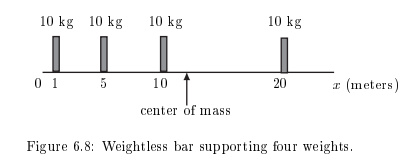

#### Answer:

First we'll solve for the center of mass, $CM = c$:

$$
\begin{equation}
    \begin{split}
        0 &= \sum_{i=1}^{M}{(x_i - c)m_i} \\
          \\
          &= (x_1 - c)m_1 + (x_2 - c)m_2 + \dots + (x_M - c)m_M \\
          \\
          &= x_1m_1 - cm_1 + x_2m_2 - cm_2 + \dots + x_Mm_M - cm_M \\
          \\
          &= \sum_{i=1}^M{x_im_i} - c\sum_{i=1}^M{m_i} 
    \end{split}
\end{equation}
$$

This implies that 

$$
\begin{equation}
    \begin{split}
        c &= \frac{\sum_{i=1}^M{x_im_i} }{ \sum_{i=1}^M{m_i} } \\
          \\
          &= \frac{1(10) + 5(10) + 10(10) + 20(10)}{10 + 10 + 10 + 10} \\
          \\
          &= \frac{360}{40} \\
          \\
          &= 9
    \end{split}
\end{equation}
$$


It is analogous to the expected value of a discrete random variable in that the weights are the probabilities assigned to each point as dictated by the PMF.

***
### 6.2 😃 (f)

For the discrete random variable with PMF

$$
p_X[k] = \frac{1}{10}
$$

for $k=0,1,2,\dots,9$, find the expected value of $X$.

#### Answer:

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X] &= \sum_{i}{x_ip_X[x_i]} \\
                      \\
                      &= (0)\frac{1}{10} + (1)\frac{1}{10} +\dots + (9)\frac{1}{10} \\
                      \\
                      &= \frac{0+1+2+3+4+5+6+7+8+9}{10} \\
                      \\
                      &= \frac{45}{10} \\
                      \\
                      &= \frac{9}{2}
    \end{split}
\end{equation}
$$

***
### 6.3 (w)

A die is tossed. The probability of obtaining a $1,2,$ or $3$ is the same. Also, the probability of obtaining a $4,5,$ or $6$ is the same. However, a $5$ is twice as likely to be observed as a $1$. For a large number of tosses, what is the average value observed?

#### Answer:

We're dealing with a weighted die so we need to first obtain the probabilities of the simple events:

$k$   |1  |2  |3  |4   |5   |6
------|---|---|---|----|----|----
$P[k]$|$a$|$a$|$a$|$2a$|$2a$|$2a$

Since all the probabilities must sum to one we see that $a = \frac{1}{9}$. Thus the actual values are

$k$   |1  |2  |3  |4   |5   |6
------|---|---|---|----|----|----
$P[k]$|$\frac{1}{9}$|$\frac{1}{9}$|$\frac{1}{9}$|$\frac{2}{9}$|$\frac{2}{9}$|$\frac{2}{9}$

From here, the expected value can be calculated as

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X] &= \sum_{i}x_ip_X[x_i] \\
                      \\
                      &= (1)\frac{1}{9} + (2)\frac{1}{9} + (3)\frac{1}{9} + (4)\frac{2}{9} + (5)\frac{2}{9} + (6)\frac{2}{9} \\
                      \\
                      &= \frac{1+2+3+8+10+12}{9}\\
                      \\
                      &= \frac{36}{9}\\
                      \\
                      &= 4
    \end{split}
\end{equation}
$$

***
### 6.4 😃 (f)

A coin is tossed with the probability of heads being $\frac{2}{3}$. A head is mapped into $X=1$ and a tail into $X=0$. What is the expected outcome of this experiment?

#### Answer:

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X] &= \sum_{i}x_ip_X[x_i] \\
                      \\
                      &= (0)(1-p) + (1)p\\
                      \\
                      &= p \\
                      \\
                      &= \frac{2}{3}
    \end{split}
\end{equation}
$$

***
### 6.5 (f)

Determine the expected value of a Poisson random variable. Hint: Differentiate $\sum_{k=0}^{\infty}{\frac{\lambda^k}{k!}e^{-\lambda}}$ with respect to $\lambda$.

#### Answer:

Recall that the PMF of a Poisson random variable is $\frac{\lambda^k}{k!}e^{-\lambda}$ where $k=0,1,2,\dots$. Then the expected value can be calculated as

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X] &= \sum_{k=-\infty}^{\infty}kp_X[k] \\
                      \\
                      &= \sum_{k=0}^{\infty}k \frac{\lambda^k}{k!}e^{-\lambda} \\
                      \\
                      &= \lambda e^{-\lambda}\sum_{k=0}^{\infty}k \frac{\lambda^{k-1}}{k!}\\
                      \\
                      &= \lambda e^{-\lambda}\sum_{k=0}^{\infty}\frac{1}{k!}\frac{d}{d\lambda}\big(\lambda^{k}\big)\\
                      \\
                      &= \lambda e^{-\lambda}\frac{d}{d\lambda} \sum_{k=0}^{\infty}\frac{\lambda^{k}}{k!} \\
                      \\
                      &= \lambda e^{-\lambda}\frac{d}{d\lambda}\big(e^{\lambda}\big)\\
                      \\
                      &= \lambda
    \end{split}
\end{equation}
$$

***
### 6.6 (t)

Consider the PMF $p_X[k] = \frac{2}{\pi}\frac{1}{k^2}$ for $k=\dots,-1,0,1\dots$. The expected value is defined as:

$$
\mathbb{E}[X] = \sum_{k=-\infty}^{\infty}{kp_X[k]}
$$

which is actually shorthand for 

$$
\mathbb{E}[X] = \lim_{N_L\to -\infty, N_U\to \infty} \sum_{k=N_L}^{N_U}{kp_X[k]}
$$

where the $L$ and $U$ represent "lower" and "upper", respectively. This may be written as 

$$
\begin{equation}
    \begin{split}
\mathbb{E}[X] = \lim_{N_L\to -\infty} \sum_{k=N_L}^{-1}{kp_X[k]} + \lim_{N_U\to \infty} \sum_{k=1}^{N_U}{kp_X[k]}
    \end{split}
\end{equation}
$$

where the limits are taken _independently_ of each other. For $\mathbb{E}[X]$ to be unambiguous and finite both limits must be finite. **If, however, we were to constrain $N_L=N_U$, show that the expected value is zero.** 

#### Notes:

- Note that if $N_L=N_U$, we are reordering the terms before performing the sum since the partial sums become $\sum_{k=-1}^{1}{kp_X[k]}$, $\sum_{k=-2}^{2}{kp_X[k]}$, etc. 

- But for the expected value to be unambiguous, the value should not depend on the ordering. 

- If a sum is [_absolutely_ summable](https://encyclopediaofmath.org/wiki/Absolute_summability), any ordering will produce the same result [Gaughan 1975], hence our requirement for the existence of the expected value.

#### Answer:

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X] &= \lim_{N_L\to -\infty} \sum_{k=N_L}^{-1}{kp_X[k]} + \lim_{N_U\to \infty} \sum_{k=1}^{N_U}{kp_X[k]} \\
                      \\
                      &= \lim_{N\to -\infty} \sum_{k=N}^{-1}{k\frac{2}{\pi}\frac{1}{k^2}} + \lim_{N\to \infty} \sum_{k=1}^{N}{k\frac{2}{\pi}\frac{1}{k^2}}\\
                      \\
                      &= -\frac{2}{\pi}\lim_{N\to \infty}{ \sum_{k=1}^{N}{\frac{1}{k}} } + \frac{2}{\pi}\lim_{N\to \infty}{ \sum_{k=1}^{N}{\frac{1}{k}} }
                      \\
                      &= \bigg(-\frac{2}{\pi} + \frac{2}{\pi} \bigg)\lim_{N\to \infty}{ \sum_{k=1}^{N}{\frac{1}{k}} }\\
                      \\
                      &= 0
    \end{split}
\end{equation}
$$

***
### 6.7 (t)

Assume that a discrete random variable takes on the values $k=\dots,-1,0,1,\dots$ and that it's PMF satisfies $p_X[m+i] = p_X[m-i]$, where $m$ is a fixed integer and $i=1,2,\dots$. This says that the PMF is symmetric about the point $x=m.$ Prove that the expected value of the random variable is $\mathbb{E}[X] = m$.

#### Answer:

Assume that a discrete random variable takes on the values $k=\dots,-1,0,1,\dots$ and that it's PMF satisfies $p_X[m+i] = p_X[m-i]$, where $m$ is a fixed integer and $i=1,2,\dots$. The expected value of the random variable is:

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X] &= \sum_{k=-\infty}^{\infty}{k p_X[k]} \\
                      \\
                      &= \sum_{k=-\infty}^{m-1}{k p_X[k]} + m p_X[m] + \sum_{k=m+1}^{\infty}{k p_X[k]} \\
                      \\
                      &= \sum_{i=1}^{\infty}{(m-i) p_X[m-i]} + m p_X[m] + \sum_{i=1}^{\infty}{(m+i) p_X[m+i]} \\                                     \\
                      &= \sum_{i=1}^{\infty}{m p_X[m-i]} - \sum_{i=1}^{\infty}{i p_X[m-i]} + m p_X[m] + \sum_{i=1}^{\infty}{m p_X[m+i]} + \sum_{i=1}^{\infty}{i p_X[m+i]} \\ 
                      \\
                      &= - \sum_{i=1}^{\infty}{i p_X[m+i]} + \bigg( m\sum_{i=1}^{\infty}{ p_X[m-i]} + m p_X[m] + m\sum_{i=1}^{\infty}{ p_X[m+i]} \bigg) + \sum_{i=1}^{\infty}{i p_X[m+i]} \\ 
                      \\                      
                      &= m\bigg( \sum_{i=1}^{\infty}{p_X[m-i]} + p_X[m] + \sum_{i=1}^{\infty}{ p_X[m+i]} \bigg) \\                                   \\
                      &= m\sum_{i=-\infty}^{\infty}{p_X[i]} \\                                   \\
                      &= m         
    \end{split}
\end{equation}
$$

***
### 6.8 😃 (t)

Give an example where the expected value of a random variable is _not_ its most probable value.

#### Answer:

Let $m\in\mathbb{R}$ be a constant. Then for a discrete random variable $X$: 

$$
\begin{equation}
    p_X[x_i] = 
    \begin{cases}
        \frac{1}{9}, &x_i=m \\
        \frac{1}{9}, &x_i=m+1 \\
        \frac{1}{9}, &x_i=m-1 \\
        \frac{1}{3}, &x_i=m+2 \\
        \frac{1}{3}, &x_i=m-2
    \end{cases}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X] &= \sum_i{x_i p_X[x_i]}\\
                      \\  
                      &= (m)\frac{1}{9} + (m+1)\frac{1}{9} + (m-1)\frac{1}{9} + (m+2)\frac{1}{3} + (m-2)\frac{1}{3}\\
                      \\
                      &= \frac{m + m+1 + m-1 + 3m+6 + 3m-6}{9}\\
                      \\
                      &= m
    \end{split}
\end{equation}
$$

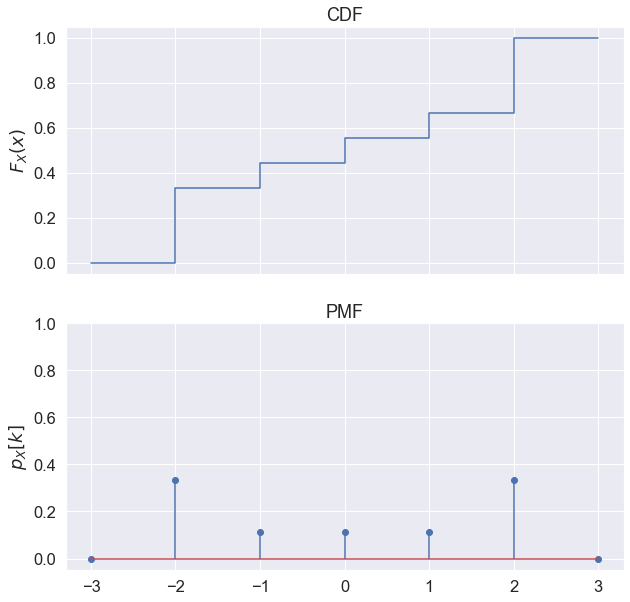

In [8]:
m = 0
x = [*range(m-3, m+4)]
pX = [0, 1/3, 1/9, 1/9, 1/9 , 1/3, 0]
plot_CDF_PMF(x, pX)

***
### 6.9 (t)

Give an example of two PMFs that have the same expected value.

#### Answer:

Let $m\in\mathbb{R}$ be a constant. Then for a discrete random variable $X_1$ (as defined in 6.8)

$$
\begin{equation}
    p_{X_1}[x_i] = 
    \begin{cases}
        \frac{1}{9}, &x_i=m \\
        \frac{1}{9}, &x_i=m+1 \\
        \frac{1}{9}, &x_i=m-1 \\
        \frac{1}{3}, &x_i=m+2 \\
        \frac{1}{3}, &x_i=m-2
    \end{cases}
\end{equation}
$$

and a discrete random variable $X_2$
$$
\begin{equation}
    p_{X_2}[x_i] = 
    \begin{cases}
        \frac{1}{5}, &x_i=m \\
        \frac{1}{5}, &x_i=m+1 \\
        \frac{1}{5}, &x_i=m-1 \\
        \frac{1}{5}, &x_i=m+2 \\
        \frac{1}{5}, &x_i=m-2
    \end{cases}
\end{equation}
$$

$\mathbb{E}[X_1] = \mathbb{E}[X_2] = m$.

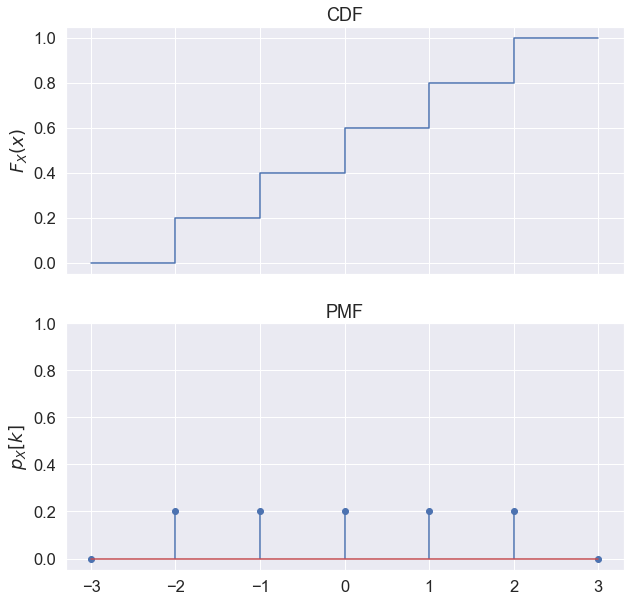

In [10]:
m = 0
x2 = [*range(m-3, m+4)]
pX2 = [0, 1/5, 1/5, 1/5, 1/5 , 1/5, 0]
plot_CDF_PMF(x2, pX2)

***
### 6.10 (f)

A discrete random variable $X$ has the PMF $p_X[k]$ for $k=0,1,2,3,4$. If $Y = \sin{(\frac{\pi}{2}X)}$, find $\mathbb{E}[Y]$ using (6.4) and (6.5). Which way is easier?

#### Answer:

Version 1:

Using (6.5) and letting $Y = g(X) = \sin{(\frac{\pi}{2}X)}$ we see that

$$
\begin{equation}
\begin{split}
    \mathbb{E}[Y] &= \sum_i{g(x_i) p_X[x_i]}\\
                  \\
                  &= \frac{\sin{(0)}}{5} + \frac{\sin{(\frac{\pi}{2})}}{5} + \frac{\sin{(\pi)}}{5} + \frac{\sin{(\frac{3}{2})}}{5} + \frac{\sin{(2\pi)}}{5}\\
                  \\
                  &= 0
\end{split}
\end{equation}
$$

Version 2:

First, we must find the PMF of the transformation
$$
\begin{equation}
    \begin{split}
    p_Y[y_i] &= 
    \begin{cases}
        p_X[1], &y_i=1 \\
        p_X[0]+p_X[2]+p_X[4], &y_i=0 \\
        p_X[3], &y_i=-1
    \end{cases} \\
    \\
    &=
    \begin{cases}
        \frac{1}{5}, &y_i=1 \\
        \frac{3}{5}, &y_i=0 \\
        \frac{1}{5}, &y_i=-1
    \end{cases}
    \end{split}
\end{equation}
$$

Now we can calculate the expected value using (6.4):

$$
\begin{equation}
\begin{split}
    \mathbb{E}[Y] &= \sum_i{y_i p_Y[y_i]}\\ 
                  \\
                  &= (1)\frac{1}{5} + (0)\frac{3}{5} + (-1)\frac{1}{5}\\
                  \\
                  &= 0
\end{split}
\end{equation}
$$

***
### 6.11 (t)

Prove the linearity property of the expectation operator

$$
\mathbb{E}[a_1g_1(X) + a_2g_2(X)] = a_1\mathbb{E}[g_1(X)] + a_2\mathbb{E}[g_2(X)]
$$

wherre $a_1$ and $a_2$ are constants.

#### Answer:

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[a_1g_1(X) + a_2g_2(X)] &= \sum_{i}g(x_i)p_X[x_i] \\
                                          \\
                                          &= \sum_{i}\bigg(a_1g_1(x_i) + a_2g_2(x_i)\bigg)p_X[x_i]\\
                                          \\
                                          &= \sum_{i}a_1g_1(x_i)p_X[x_i] + \sum_{i}a_2g_2(x_i)p_X[x_i] \\
                                          \\
                                          &= a_1\sum_{i}g_1(x_i)p_X[x_i] + a_2\sum_{i}g_2(x_i)p_X[x_i]\\
                                          \\
                                          &=  a_1\mathbb{E}[g_1(X)] + a_2\mathbb{E}[g_2(X)]
    \end{split}
\end{equation}
$$

***
### 6.12 😃 (f)

Determine $\mathbb{E}[X^2]$ for a $geom(p)$ random variable using (6.5). Hint: You'll need to differentiate twice.

#### Answer:

Recall that the PMF of a Geometric random variable is $p_X[k] = (1-p)^{k-1}p$ where $k=1,2,\dots$. Then the expected value can be calculated as

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X^2] &= \sum_{k=-\infty}^{\infty}k^2(1-p)^{k-1}p \\
                        \\
                        &= \sum_{k=1}^{\infty}{k^2(1-p)^{k-1}p} + \sum_{k=1}^{\infty}{k(1-p)^{k}} - \sum_{k=1}^{\infty}{k(1-p)^{k}}   \\
                        \\
                        &= -\sum_{k=1}^{\infty}{\big(-k^2(1-p)^{k-1}p + k(1-p)^{k}\big)} + \frac{1}{p}\sum_{k=1}^{\infty}{k(1-p)^{k}p}   \\
                        \\
                        &= -\sum_{k=1}^{\infty}{k\big(-k(1-p)^{k-1}p + (1-p)^{k}\big)} + \frac{(1-p)}{p}\sum_{k=1}^{\infty}{k(1-p)^{k-1}p}   \\
                        \\                        
                        &= -\sum_{k=1}^{\infty}{k \frac{d}{dp}\big((1-p)^{k}p\big)} + \frac{(1-p)}{p}\mathbb{E}[X]   \\
                        \\
                        &= - \frac{d}{dp}\sum_{k=1}^{\infty}{k (1-p)^{k-1}p}(1-p) + \frac{(1-p)}{p^2} \\
                        \\
                        &= -\frac{d}{dp}\big(\mathbb{E}[X](1-p) \big) + \frac{(1-p)}{p^2} \\
                        \\
                        &= -\frac{d}{dp}\bigg(\frac{(1-p)}{p} \bigg) + \frac{(1-p)}{p^2} \\
                        \\
                        &= -\frac{-1}{p^2} + \frac{(1-p)}{p^2} \\
                        \\
                        &= \frac{2 }{p^2} + \frac{1}{p} 
    \end{split}
\end{equation}
$$

***
### 6.13 😃 (t)

Can $\mathbb{E}[X^2]$ ever be equal to $\mathbb{E}^2[X]$? If so, when?

#### Answer:

Yes, this is the case when $var(X) = \mathbb{E}[X^2] - \mathbb{E}^2[X] = 0$. Put another way, this occurs when $X=c$ where $c\in\mathbb{R}$ is a constant.

***
### 6.14 😃 (w)

A discrete random variable $X$ has the PMF

$$
\begin{equation}
    p_X[k] = 
    \begin{cases}
        \frac{1}{8}, &k=1 \\
        \frac{2}{8}, &k=2 \\
        \frac{4}{8}, &k=3 \\
        \frac{1}{8}, &k=4
    \end{cases}
\end{equation}
$$

If the experiment that produces a value of $X$ is conducted, find the minimum mean square error predictor of the outcome? What is the minimum mean square error of the predictor?

#### Answer:

The minimum mean square error predictor of the outcome is $b_{opt} = \mathbb{E}[X]$. Now let's calculate $\mathbb{E}[X]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X] &= \sum_{i}{kp_X[k]}\\
                   \\
                   &= (1)\frac{1}{8} + (2)\frac{2}{8} + (3)\frac{4}{8} + (4)\frac{1}{8} \\
                   \\
                   &= \frac{21}{8}
    \end{split}
\end{equation}
$$

Next, let's calculate $\mathbb{E}[X^2]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X^2] &= \sum_{i}{k^2p_X[k]}\\
                   \\
                   &= (1)^2\frac{1}{8} + (2)^2\frac{2}{8} + (3)^2\frac{4}{8} + (4)^2\frac{1}{8} \\
                   \\
                   &= \frac{61}{8}
    \end{split}
\end{equation}
$$

Thus, the minimum mean square error of the predictor is:

$$
\begin{equation}
    \begin{split}
         mse_{\min}&= mse(b_{opt})\\
                   \\
                   &= \mathbb{E}[X^2] -2b_{opt}\mathbb{E}[X] + b_{opt}^2\\
                   \\
                   &=  \mathbb{E}[X^2] -\mathbb{E}^2[X] \\
                   \\
                   &= var(X) \\
                   \\
                   &= \frac{61}{8} - \bigg(\frac{21}{8}\bigg)^2\\
                   \\
                   &= \frac{47}{64}
    \end{split}
\end{equation}
$$

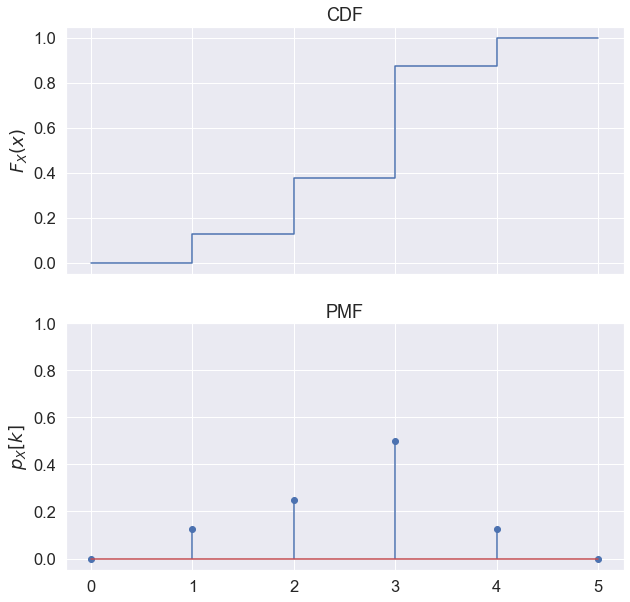

In [6]:
x = [0,1,2,3,4,5]
pX = [0,0.125, 0.25, 0.5, 0.125,0]
plot_CDF_PMF(x, pX)

***
### 6.15 😃 (c)

For Problem 6.14 use a computer to simulate the experiment for many trials. Compare the estimate to the actual outcomes of the computer experiment. Also, compute the minimum mean square error and compare it to the theoretical value obtained in Problem 6.14.

#### Answer:

Recall that the estimated mean, given $N$ trials, is:

$$
\widehat{\mathbb{E}[X]} = \frac{1}{N}\sum_{i=1}^{N}{x_i}
$$


and the estimated variance, given $N$ trials, is:

$$
\widehat{var(X)} = \frac{1}{N}\sum_{i=1}^{N}{x_i^2} - \bigg( \frac{1}{N}\sum_{i=1}^{N}{x_i} \bigg)^2
$$

In [20]:
# Set up and run experiment N times
N = 10000
xs = [1,2,3,4]
pX = [0.125, 0.25, 0.5, 0.125]
outcomes = np.random.choice(xs, size=N, replace=True, p=pX)

# Calculations
mean_est = sum(outcomes) / N 
var_est = sum(outcomes**2) / N - mean_est**2

# Report results
print(f'Mean estimate: {mean_est}\nE[X] = {21/8}')
print(f'Variance estimate: {var_est}\nvar(X) = {47/64}')

Mean estimate: 2.6332
E[X] = 2.625
Variance estimate: 0.7432577599999997
var(X) = 0.734375


***
### 6.16 (w)

Of the three PMFs shown in Figure 6.9, which one has the smallest variance? Hint: You do not need to actually calculate the variances.

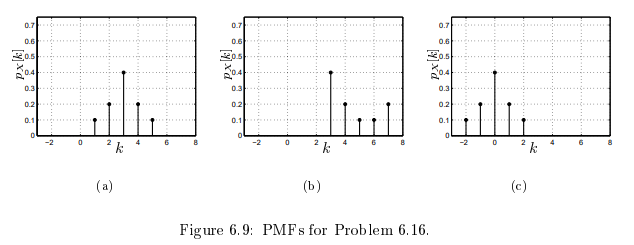

#### Answer:

Intuitively, (c) should have the lowest variance because it's centered around zero and has the highest weight there as well. Let's do the calculations to be sure:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X_1] &= \sum_{i}{k^2p_{X_1}[k]}\\
                   \\
                   &= (1)^2\frac{1}{10} + (2)^2\frac{2}{10} + (3)^2\frac{4}{8} + (4)^2\frac{2}{10} + (5)^2\frac{1}{10}\\
                   \\
                   &= \frac{102}{10}
    \end{split}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X_2] &= \sum_{i}{k^2p_{X_2}[k]}\\
                   \\
                   &= (3)^2\frac{4}{10} + (4)^2\frac{2}{10} + (5)^2\frac{1}{8} + (6)^2\frac{1}{10} + (7)^2\frac{2}{10}\\
                   \\
                   &= \frac{227}{10}
    \end{split}
\end{equation}
$$

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X_3] &= \sum_{i}{k^2p_{X_3}[k]}\\
                   \\
                   &= (-2)^2\frac{1}{10} + (-1)^2\frac{2}{10} + (0)^2\frac{4}{8} + (1)^2\frac{2}{10} + (2)^2\frac{1}{10}\\
                   \\
                   &= \frac{12}{10}
    \end{split}
\end{equation}
$$

***
### 6.17 (w)

If $Y = aX + b$, what is the variance of $Y$ in terms of the variance of $X$?

#### Answer:

$$
\begin{equation}
    \begin{split}
        var(Y) &= \mathbb{E}[Y^2] - \mathbb{E}^2[Y]\\
               \\
               &= \mathbb{E}[(aX + b)^2] - \mathbb{E}^2[aX + b]\\
               \\
               &= \mathbb{E}[a^2X^2 + 2abX + b^2] - \big(a\mathbb{E}[X] + b\big)^2 \\
               \\
               &= a^2\mathbb{E}[X^2] + 2ab\mathbb{E}[X] + b^2 - a^2\mathbb{E}^2[X] - 2ab\mathbb{E}[X] - b^2  \\
               \\
               &= a^2\big(\mathbb{E}[X^2] - \mathbb{E}^2[X]\big) \\
               \\
               &= a^2 var(X)
    \end{split}
\end{equation}
$$

***
### 6.18 (f)

Find the variance of a Poisson random variable. See the hint for Problem 6.12.

#### Answer:

Recall that the PMF of a Poisson random variable is $p_X[k] = \frac{\lambda^k}{k!}e^{-\lambda}$ where $k=0,1,2,\dots$. First, let's calculate $\mathbb{E}[X]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X] &= \sum_{k=0}^{\infty}{k\frac{\lambda^k}{k!}e^{-\lambda}}\\
                       \\
                       &= \lambda e^{-\lambda} \sum_{k=0}^{\infty}{k\frac{\lambda^{k-1}}{k!}} \\
                       \\
                       &= \lambda e^{-\lambda} \sum_{k=0}^{\infty}{\frac{d}{d\lambda}\bigg(\frac{\lambda^{k}}{k!} \bigg)} \\
                       \\
                       &= \lambda e^{-\lambda} \frac{d}{d\lambda}\sum_{k=0}^{\infty}{\frac{\lambda^{k}}{k!}} \\
                       \\
                       &= \lambda e^{-\lambda} \frac{d}{d\lambda}\big(e^{\lambda}\big) \\
                       \\
                       &= \lambda e^{-\lambda} e^{\lambda} \\
                       \\
                       &= \lambda
\end{split}
\end{equation}
$$

Now let's calculate $\mathbb{E}[X^2]$:

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X^2] &= \sum_{k=-\infty}^{\infty}{ k^2\frac{\lambda^k}{k!}e^{-\lambda} } \\
                        \\
                        &= \lambda^2  \sum_{k=0}^{\infty}{k^2\frac{\lambda^{k-2}}{k!}e^{-\lambda}} - \lambda^2 \sum_{k=0}^{\infty}{k\frac{\lambda^{k-2}}{k!}e^{-\lambda}}  + \lambda^2 \sum_{k=0}^{\infty}{k\frac{\lambda^{k-2}}{k!}e^{-\lambda}} \\
                        \\
                        &= \lambda^2 \sum_{k=0}^{\infty}{\big(k^2\frac{\lambda^{k-2}}{k!} - k\frac{\lambda^{k-2}}{k!}\big) e^{-\lambda}} +   \sum_{k=0}^{\infty}{k\frac{\lambda^{k}}{k!}e^{-\lambda}}   \\
                        \\
                        &= \lambda^2 \bigg(\sum_{k=0}^{\infty}{\frac{1}{k!}\frac{d^2}{d\lambda^2}\big(\lambda^{k}}\big)\bigg) e^{-\lambda} + \mathbb{E}[X]   \\
                        \\                        
                        &= \lambda^2 \bigg(\frac{d^2}{d\lambda^2}\sum_{k=0}^{\infty}{\frac{\lambda^{k}}{k!}}\bigg) e^{-\lambda} + \mathbb{E}[X]  \\
                        \\
                        &= \lambda^2 \bigg(\frac{d^2}{d\lambda^2}e^{\lambda} \bigg) e^{-\lambda} + \mathbb{E}[X] \\
                        \\
                        &= \lambda^2e^{\lambda}e^{-\lambda} + \lambda \\
                        \\
                        &= \lambda^2 + \lambda
    \end{split}
\end{equation}
$$

Finally, we see that 

$$
\begin{equation}
    \begin{split}
        var(X) &= \mathbb{E}[X^2] - \mathbb{E}^2[X] \\
               \\
               &= (\lambda^2 + \lambda) - (\lambda)^2 \\
               \\
               &= \lambda
    \end{split}
\end{equation}    
$$

***
### 6.19 (f)

For the PMF given in Problem 6.2 find the variance.

#### Answer:

Recall that this refers to the discrete random variable with PMF

$$
p_X[k] = \frac{1}{10}
$$

for $k=0,1,2,\dots,9$. We found that the expected value is $\frac{9}{2}$. Next, we need to calculate $\mathbb{E}[X^2]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X^2] &= \sum_{i}{k^2p_{X_2}[k]}\\
                   \\
                   &= (0)^2\frac{1}{10} + (1)^2\frac{1}{10} + (2)^2\frac{1}{10} + \dots + (9)^2\frac{1}{10}\\
                   \\
                   &= \frac{285}{10}
    \end{split}
\end{equation}
$$

The variance can then be calculated as

$$
\begin{equation}
    \begin{split}
        var(X) &= \mathbb{E}[X^2] - \mathbb{E}^2[X]\\
               \\
               &= \frac{285}{10} - \bigg(\frac{9}{2}\bigg)^2 \\
               \\
               &= \frac{33}{4}
    \end{split}
\end{equation}
$$

***
### 6.20 😃 (f)

Find the second moment for a Poisson random variable by using the characteristic function results shown in Table 6.1

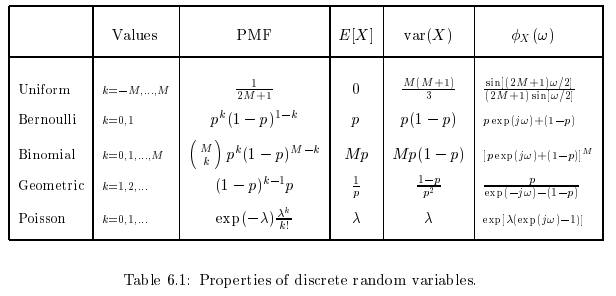

#### Answer:

From the table we see that $\phi_X(\omega) = e^{\lambda e^{j\omega} - \lambda}$. Using the moment formula we see that

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X^2] &=\frac{1}{j^2} \frac{d^2}{d\omega^2} \phi_X(\omega) \bigg|_{\omega = 0}\\ 
                         \\
                         &= -\frac{d^2}{d\omega^2} \bigg(e^{\lambda e^{j\omega} - \lambda}\bigg) \bigg|_{\omega = 0}\\
                         \\
                         &=- \frac{d}{d\omega} \bigg( \big(e^{\lambda e^{j\omega} - \lambda} \big) \big(j\lambda e^{j\omega} \big)\bigg) \bigg|_{\omega = 0}\\ 
                         \\
                         &= -j\lambda \frac{d}{d\omega} \bigg( e^{\lambda e^{j\omega} - \lambda + j\omega}\bigg) \bigg|_{\omega = 0}\\
                         \\
                         &= -j\lambda \bigg( \big(e^{\lambda e^{j\omega} - \lambda + j\omega} \big) \big(j\lambda e^{j\omega} + j\big)\bigg) \bigg|_{\omega = 0} \\
                         \\
                         &= \lambda^2 e^{\lambda e^{j\omega} - \lambda + 2j\omega}\big|_{\omega = 0} + \lambda e^{\lambda e^{j\omega} - \lambda + j\omega} \big|_{\omega = 0}\\
                         \\
                         &= \lambda^2 e^{\lambda - \lambda} + \lambda e^{\lambda - \lambda}\\
                         \\
                         &= \lambda^2 + \lambda
    \end{split}
\end{equation}
$$

***
### 6.21 (t)

If $X$ is a discrete random variable and $c$ is a constant, prove the following properties of the variance:

$$
\begin{equation}
    \begin{split}
        var(c) &= 0 \\
        var(X + c) &= var(X) \\
        var(cX) &= c^2var(X) 
    \end{split}
\end{equation}
$$

#### Answer:

- Show $ var(c) = 0$

$$
\begin{equation}
    \begin{split}
        var(c) &= \mathbb{E}[c^2] - \mathbb{E}^2[c]\\
               \\
               &= c^2 - \big(c\big)^2\\
               \\
               &= 0
    \end{split}
\end{equation}
$$

- Show $var(X + c) = var(X)$

$$
\begin{equation}
    \begin{split}
        var(X + c) &= \mathbb{E}[(X + c)^2] - \mathbb{E}^2[X + c]\\
                   \\
                   &= \mathbb{E}[X^2 + 2cX + c^2] - \big(\mathbb{E}[X] + c\big)^2\\
                   \\
                   &= \mathbb{E}[X^2] + 2c\mathbb{E}[X] + c^2 - \mathbb{E}^2[X] - 2c\mathbb{E}[X] - c^2  \\
                   \\
                   &= \mathbb{E}[X^2] - \mathbb{E}^2[X] \\
                   \\
                   &= var(X)
    \end{split}
\end{equation}
$$

- Show $var(cX) = c^2var(X)$

$$
\begin{equation}
    \begin{split}
        var(cX) &= \mathbb{E}[(cX)^2] - \mathbb{E}^2[cX]\\
               \\
               &= \mathbb{E}[c^2X^2] - \big(c\mathbb{E}[X]\big)^2\\
               \\
               &= c^2\mathbb{E}[X^2] - c^2\mathbb{E}^2[X] \\
               \\
               &= c^2\big(\mathbb{E}[X^2] - \mathbb{E}^2[X]\big) \\
               \\
               &= c^2 var(X)
    \end{split}
\end{equation}
$$

***
### 6.22 (t)

If a discrete random variable $X$ has $var(X) = 0$, prove that $X$ must be a constant $c$. This provides a converse to the property that if $X=c$, then $var(X) = 0$.

#### Answer:

Assume that $var(X)=0$. This implies that 

$$
\begin{equation}
    \begin{split}
        0 &= \mathbb{E}[X^2] - \mathbb{E}^2[X] \\
          \\
          &= \sum_{i}{x_i^2 p_X[x_i]} - \bigg( \sum_{i}{x_i p_X[x_i]} \bigg)^2 \\
          \\
         \bigg( \sum_{i}{x_i p_X[x_i]} \bigg)^2 &= \sum_{i}{x_i^2 p_X[x_i]} \\
         \\
        x_1^2 p_X[x_1]^2 + 2x_1x_2 p_X[x_1]p_X[x_2] + \dots  &= x_1^2 p_X[x_1] + x_2^2 p_X[x_2] + \dots
    \end{split}
\end{equation}
$$

Since both sides of the equation must match we can conclude that all the cross-terms on the LHS of the equation must equal zero so

$$
p_X[x_i] =
    \begin{cases}
        1, i=j \\
        0, i\neq j
    \end{cases}
$$

for some particular index $j$ where $x_j=c$. This implies that $X = c\in \mathbb{R}$ for some constant $c$.

***
### 6.23 (t)

In this problem we prove that if $\mathbb{E}[X^s]$ exists (meaning that $\mathbb{E}[|X|^s] < \infty$), then $\mathbb{E}[X^r]$ also exists for $0 < r < s$. Provide the explanations for the following steps:

- For $|x| \leq 1$, $|x|^r \leq 1$


- For $|x| > 1$, $|x|^r \leq |x|^s$


- For all $|x|$, $|x|^r \leq |x|^s + 1$


- $\mathbb{E}[|X|^r] = \sum_i{|x_i|^r p_X[x_i]} \leq  \sum_i{(|x_i|^s + 1) p_X[x_i]} = \mathbb{E}[|X|^s] + 1 < \infty$

#### Answer:

![finish-me.jpg](https://i.pinimg.com/564x/a4/b6/38/a4b638b7d6926e4f494b1d94459052ff.jpg)

***
### 6.24 (f)

If a discrete random variable has the PMF $p_X[k] = \frac{1}{4}$ for $k=-1$ and $p_X[k] = \frac{3}{4}$ for $k=1$, find the mean and variance.

#### Answer:

First, we need to calculate $\mathbb{E}[X]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X] &= \sum_{i}{kp_{X}[k]}\\
                       \\
                       &= (-1)\frac{1}{4} + (1)\frac{3}{4} \\
                       \\
                       &= \frac{1}{2}
    \end{split}
\end{equation}
$$

Next, we need to calculate $\mathbb{E}[X^2]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X^2] &= \sum_{i}{k^2p_{X}[k]}\\
                         \\
                         \\
                         &= (-1)^2\frac{1}{4} + (1)^2\frac{3}{4} \\
                         \\
                         &= 1
    \end{split}
\end{equation}
$$

The variance can then be calculated as

$$
\begin{equation}
    \begin{split}
        var(X) &= \mathbb{E}[X^2] - \mathbb{E}^2[X]\\
               \\
               &= 1 - \bigg(\frac{1}{2}\bigg)^2 \\
               \\
               &= \frac{3}{4}
    \end{split}
\end{equation}
$$

***
### 6.25 (f)

A symmetric PMF satisfies the relationship $p_X[-k] = p_X[k]$ for $k=\dots,-1,0,1,\dots$. Prove that all the odd order moments, $\mathbb{E}[X^n]$ for $n$ odd, are zero.

#### Answer:

Let's assume $p_X[-k] = p_X[k]$ for $k=\dots,-1,0,1,\dots$. Now let's calculate the $n^{th}$ moment

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[X^n] &= \frac{1}{j^n} \frac{d^n}{d\omega^n}\phi_X(\omega)\bigg|_{\omega = 0} \\
                        \\
                        &= \frac{1}{j^n} \frac{d^n}{d\omega^n}\bigg( \sum_{k=-\infty}^{\infty}{ e^{j\omega k}p_X[k] } \bigg)\bigg|_{\omega = 0}\\
                        \\
                        &= \frac{1}{j^n} \frac{d^n}{d\omega^n}\bigg( \sum_{k=-\infty}^{-1}{ e^{j\omega k}p_X[k]} + p_X[0] + \sum_{k=1}^{\infty}{ e^{j\omega k}p_X[k] } \bigg)\bigg|_{\omega = 0} \\
                        \\
                        &= \frac{1}{j^n} \frac{d^n}{d\omega^n}\bigg( \sum_{k=1}^{\infty}{ e^{-j\omega k}p_X[-k]} + p_X[0] + \sum_{k=1}^{\infty}{ e^{j\omega k}p_X[k] } \bigg)\bigg|_{\omega = 0} \\
                        \\
                        &= \frac{1}{j^n} \frac{d^n}{d\omega^n}\bigg( \sum_{k=1}^{\infty}{ \big(e^{-j\omega k} + e^{j\omega k}\big)p_X[k]} + p_X[0] \bigg)\bigg|_{\omega = 0} \\
                        \\
                        &= \frac{2}{j^n} \frac{d^n}{d\omega^n}\bigg( \sum_{k=1}^{\infty}{ \cos{(\omega k)}p_X[k]} + p_X[0] \bigg)\bigg|_{\omega = 0} \\       
                        \\
                        &= \frac{2}{j^n} \sum_{k=1}^{\infty}{\frac{d^n}{d\omega^n}\big(\cos{(\omega k)}\big)p_X[k]}\bigg|_{\omega = 0} \\  
                        \\
                        &= \frac{2}{j^n} \sum_{k=1}^{\infty}{(-1)^{m+1}\sin{(\omega k)}p_X[k]}\bigg|_{\omega = 0} \\                                   \\
                        &= 0
    \end{split}
\end{equation}
$$

where we used the fact that $(-1)^{m+1}\sin{(\omega k)}\big|_{\omega = 0} = 0$ for $m \in\mathbb{Z}_{odd}\cup\{0\}$.

***
### 6.26 😃(t)

A central moment of a discrete random variable is defined as $\mathbb{E}[(X - \mathbb{E}[X])^n]$ for $n$ a positive integer. Derive a formula that relates the central moment to the usual moments. Hint: You will need the binomial formula.

#### Answer:

$$
\begin{equation}
    \begin{split}
        \mathbb{E}[(X - \mathbb{E}[X])^n] &= \mathbb{E}[\sum_{k=0}^n{ {n\choose k}X^k(-\mathbb{E}[X])^{n-k} }] \\
                                          \\
                                          &= \sum_{k=0}^n{ \mathbb{E}[ {n\choose k}X^k(-\mathbb{E}[X])^{n-k} ]} \\
                                          \\
                                          &= \sum_{k=0}^n {{n\choose k} (-1)^{n-k}\mathbb{E}[X^k] \mathbb{E}[X]^{n-k} } \\
    \end{split}
\end{equation}
$$

***
### 6.27 😃(t)

If $Y = aX + b$ find the characteristic function of $Y$ in terms of that for $X$. Next use your result to prove that $\mathbb{E}[Y] = a\mathbb{E}[X] + b$.

#### Answer:

Let $Y = g(X) = aX+b$ and $h(x) = e^{j\omega x}$. Then the characteristic function is

$$
\begin{equation}
    \begin{split}
        \phi_Y(\omega) &= \mathbb{E}[h(Y)] \\
                       \\
                       &= \mathbb{E}[h(g(X))] \\
                       \\
                       &= \sum_{k=-\infty}^{\infty}{ e^{j\omega g(k)}p_X[k] } \\
                       \\
                       &= \sum_{k=-\infty}^{\infty}{ e^{j\omega (aX+b)}p_X[k] } \\
                       \\
                       &= \sum_{k=-\infty}^{\infty}{ e^{j\omega aX} e^{j\omega b}p_X[k] } \\
                       \\
                       &= e^{j\omega b} \sum_{k=-\infty}^{\infty}{ e^{j\omega aX} p_X[k] } \\
                       \\
                       &= e^{j\omega b} \phi_X(a\omega)
    \end{split}
\end{equation}
$$

***
### 6.28 😃(f)

Find the characteristic function for the PMF $p_x[k] = \frac{1}{5}$ for $-2,-1,0,1,2$.

#### Answer:

$$
\begin{equation}
    \begin{split}
        \phi_X(\omega) &= \mathbb{E}[e^{j\omega X}] \\
                       \\
                       &=\sum_{k\in\{-2,-1,0,1,2\}}{ e^{j\omega k}p_X[k] }  \\
                       \\
                       &= \sum_{k\in\{-2,-1,0,1,2\}}{ e^{j\omega k}\frac{1}{5} } \\
                       \\
                       &= \frac{1}{5}( e^{-j2\omega } + e^{-j\omega } + 1 + e^{j\omega } + e^{j2\omega }) \\
                       \\
                       &=  \frac{1}{5}\big(1 + 2\cos{(\omega)} + 2\cos{(2\omega)} \big)
    \end{split}
\end{equation}
$$

***
### 6.29 (f)

Determine the variance of a binomial random variable by using the properties of the characteristic function. You can assume knowledge of the characteristic function for a binomial random variable.

#### Answer:

From table 6.1 we see that $\phi_X(\omega) = \big(pe^{j\omega} + (1-p)\big)^m$. Using the moment formula we see that

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X] &=\frac{1}{j} \frac{d}{d\omega} \phi_X(\omega) \bigg|_{\omega = 0}\\ 
                         \\
                         &= \frac{1}{j} \frac{d}{d\omega} \bigg( \big(pe^{j\omega} + (1-p)\big)^m \bigg) \bigg|_{\omega = 0}\\
                         \\
                         &= \frac{1}{j} \bigg( m\big(pe^{j\omega} + (1-p)\big)^{m-1}\big(jpe^{j\omega}\big) \bigg) \bigg|_{\omega = 0}\\
                         \\                         
                         &= mp(p + (1-p))^{m-1} \\
                         \\
                         &= mp
    \end{split}
\end{equation}
$$

Next, we need to calculate $\mathbb{E}[X^2]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X^2] &= \frac{1}{j^2} \frac{d^2}{d\omega^2} \phi_X(\omega) \bigg|_{\omega = 0}\\ 
                         \\
                         &= \frac{1}{j^2}\frac{d^2}{d\omega^2} \bigg(\big(pe^{j\omega} + (1-p)\big)^m\bigg) \bigg|_{\omega = 0}\\
                         \\
                         &= \frac{1}{j^2}\frac{d}{d\omega} \bigg(m\big(pe^{j\omega} + (1-p)\big)^{m-1}\big(jpe^{j\omega}\big)\bigg) \bigg|_{\omega = 0}\\
                         \\
                         &= \frac{mp}{j}\frac{d}{d\omega} \bigg((m-1)\big(pe^{j\omega} + (1-p)\big)^{m-2}\big(jpe^{j\omega}\big)e^{j\omega} + j\big(pe^{j\omega} + (1-p)\big)^{m-1}e^{j\omega} \bigg) \bigg|_{\omega = 0}\\
                         \\
                         &= \frac{mp}{j} \bigg( (m-1)jp + j \bigg)\\
                         \\
                         &= mp^2(m - 1) + mp\\
                         \\
                         &= m^2p^2 - mp^2 + mp
    \end{split}
\end{equation}
$$

The variance can then be calculated as

$$
\begin{equation}
    \begin{split}
        var(X) &= \mathbb{E}[X^2] - \mathbb{E}^2[X]\\
               \\
               &= (m^2p^2 - mp^2 + mp) - (mp)^2 \\
               \\
               &= mp(1-p)
    \end{split}
\end{equation}
$$

***
### 6.30 (f)

Determine the mean and variance of a Poisson random variable by using the properties of the characteristic function. You can assume knowledge of the characteristic function for a Poisson random variable.

#### Answer:

From table 6.1 we see that $\phi_X(\omega) = e^{\lambda e^{j\omega} - \lambda}$. Using the moment formula we see that

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X] &=\frac{1}{j} \frac{d}{d\omega} \phi_X(\omega) \bigg|_{\omega = 0}\\ 
                         \\
                         &= \frac{e^{-\lambda}}{j} \bigg(e^{\lambda e^{j\omega}} \big(j\lambda e^{j\omega}\big) \bigg) \bigg|_{\omega = 0}\\
                         \\
                         &= \lambda e^{- \lambda}e^{\lambda }\\
                         \\
                         &= \lambda
    \end{split}
\end{equation}
$$

Next, we need to calculate $\mathbb{E}[X^2]$:

$$
\begin{equation}
    \begin{split}
         \mathbb{E}[X^2] &=\frac{1}{j^2} \frac{d^2}{d\omega^2} \phi_X(\omega) \bigg|_{\omega = 0}\\ 
                         \\
                         &= -\frac{d^2}{d\omega^2} \bigg(e^{\lambda e^{j\omega} - \lambda}\bigg) \bigg|_{\omega = 0}\\
                         \\
                         &=- \frac{d}{d\omega} \bigg( \big(e^{\lambda e^{j\omega} - \lambda} \big) \big(j\lambda e^{j\omega} \big)\bigg) \bigg|_{\omega = 0}\\ 
                         \\
                         &= -j\lambda \frac{d}{d\omega} \bigg( e^{\lambda e^{j\omega} - \lambda + j\omega}\bigg) \bigg|_{\omega = 0}\\
                         \\
                         &= -j\lambda \bigg( \big(e^{\lambda e^{j\omega} - \lambda + j\omega} \big) \big(j\lambda e^{j\omega} + j\big)\bigg) \bigg|_{\omega = 0} \\
                         \\
                         &= \lambda^2 e^{\lambda e^{j\omega} - \lambda + 2j\omega}\big|_{\omega = 0} + \lambda e^{\lambda e^{j\omega} - \lambda + j\omega} \big|_{\omega = 0}\\
                         \\
                         &= \lambda^2 e^{\lambda - \lambda} + \lambda e^{\lambda - \lambda}\\
                         \\
                         &= \lambda^2 + \lambda
    \end{split}
\end{equation}
$$

The variance can then be calculated as

$$
\begin{equation}
    \begin{split}
        var(X) &= \mathbb{E}[X^2] - \mathbb{E}^2[X]\\
               \\
               &= (\lambda^2 + \lambda) - ( \lambda)^2 \\
               \\
               &= \lambda
    \end{split}
\end{equation}
$$

***
### 6.31 (f)

Which PMF $p_X[k]$ for $k = \dots, -1,0,1,\dots$ has the characteristic function $\phi_X(\omega) = \cos{(\omega)}$?

#### Answer:

Let's reexpress the characteristic function:

$$
\begin{equation}
    \begin{split}
        \phi_X(\omega) &= \cos{(\omega)} \\
                       &= \frac{1}{2}\big(e^{j\omega} + e^{-j\omega} \big)
    \end{split}
\end{equation}
$$

Now, using the inverse Fourier Transform 

$$
\begin{equation}
    \begin{split}
        p_X[k] &= \frac{1}{2\pi}\int_{-\pi}^{\pi}{\phi_X(\omega)e^{-j\omega k}d\omega} \\
               \\
               &= \frac{1}{4\pi}\int_{-\pi}^{\pi}{\big(e^{j\omega} + e^{-j\omega} \big)e^{-j\omega k}d\omega} \\
               \\
               &= \frac{1}{4\pi}\int_{-\pi}^{\pi}{\big(e^{j\omega(1-k)} + e^{-j\omega(1+k)} \big) d\omega} \\
               \\
               &= \frac{1}{4\pi}\int_{-\pi}^{\pi}{e^{j\omega(1-k)}  d\omega} + \frac{1}{4\pi}\int_{-\pi}^{\pi}{e^{-j\omega(1+k)}  d\omega} \\
               \\
               &= \frac{1}{4\pi j(1-k)}\big(e^{j\pi(1-k)} - e^{-j\pi(1-k)} \big) -  \frac{1}{4\pi j(1+k)}\big( e^{-j\pi(1+k)} - e^{j\pi(1+k)} \big) \\
               \\
               &= \frac{1}{2\pi (1-k)}\sin{\big(\pi(1-k)\big)} + \frac{1}{2\pi (1+k)}\sin{\big(\pi(1+k)\big)} \\
               \\
               &= \frac{1}{2}sinc{\big(\pi(1-k)\big)} + \frac{1}{2}sinc{\big(\pi(1+k)\big)}
    \end{split}
\end{equation}
$$

for $k = \dots, -1,0,1,\dots$. Thus, the PMF on this domain is

$$
\begin{equation}
    p_X[k] =
    \begin{cases}
        \frac{1}{2}, &k=-1,1 \\
        0, &else
    \end{cases}
\end{equation}    
$$

***
### 6.32 😃(c)

For the random variable described in Problem 6.24 perform a computer simulation and estimate its mean and variance. How does it compare to the true mean and variance?

#### Answer:



In [4]:
# Set up and run experiment N times
N = 10000
xs = [-1,1]
pX = [0.25, 0.75]
outcomes = np.random.choice(xs, size=N, replace=True, p=pX)

# Calculations
mean_est = sum(outcomes) / N 
var_est = sum(outcomes**2) / N - mean_est**2

# Report results
print(f'Mean estimate: {mean_est}\nE[X] = {0.5}')
print(f'Variance estimate: {var_est}\nvar(X) = {0.75}')

Mean estimate: 0.4976
E[X] = 0.5
Variance estimate: 0.75239424
var(X) = 0.75
